# Prepare raw data for curvecurator

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
from Bio.ExPASy import cellosaurus
from drevalpy.datasets.curvecurator import _exec_curvecurator, preprocess, postprocess

## Load Data

In [2]:
RAW_FILE_PATH = Path("NIHMS361223-supplement-4.xlsx")

In [3]:
overview_df = pd.read_excel(RAW_FILE_PATH)
overview_df

,Unnamed: 0
0,Supplementary tables
1,NaN
2,Table S1: CCLE cell lines and associated data
3,Table S2: Oncomap assays and associated mutations
4,Table S3: Pearson correlation coefficients for...
5,Table S4: Pearson correlation coefficients for...
6,Table S5: Pearson correlation coefficients for...
7,Table S6: Compounds profiled
8,Table S7: Known predictors of drug response id...
9,Table S8: Genomic features predicting sensitiv...


In [4]:
cellline_df = pd.read_excel(RAW_FILE_PATH, sheet_name=1, skiprows=2)
cellline_df

,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,NaN,NaN,central_nervous_system,glioma,astrocytoma,glioma,solid,"Identical lines: U-118 MG, U-138 MG and 1321N1...",ECACC,1.0,1,NaN,1.0,1.0
1,143B_BONE,143B,NaN,F,bone,osteosarcoma,NaN,osteosarcoma,solid,Identical lines: HOS and 143B share high SNP i...,ATCC,1.0,1,NaN,1.0,NaN
2,22RV1_PROSTATE,22Rv1,NaN,M,prostate,carcinoma,NaN,prostate,solid,NaN,ATCC,1.0,1,1.0,1.0,1.0
3,2313287_STOMACH,23132/87,NaN,M,stomach,carcinoma,adenocarcinoma,stomach,solid,NaN,DSMZ,1.0,1,1.0,1.0,NaN
4,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,NaN,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,DSMZ,1.0,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,YH13_CENTRAL_NERVOUS_SYSTEM,YH-13,NaN,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1,1.0,1.0,NaN
943,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,NaN,F,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1,1.0,1.0,1.0
944,YMB1_BREAST,YMB-1,NaN,F,breast,carcinoma,NaN,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,HSRRB,1.0,1,NaN,1.0,NaN
945,ZR751_BREAST,ZR-75-1,NaN,F,breast,carcinoma,ductal_carcinoma,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,ATCC,1.0,1,1.0,1.0,1.0


In [5]:
drug_df = pd.read_excel(RAW_FILE_PATH, sheet_name=6, skiprows=2)
drug_df

,Compound (code or generic name),Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization
0,Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech
1,Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline
2,PHA-665752,NaN,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer
3,PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer
4,TAE684,NaN,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis
5,Vandetanib,Zactima,"Abl, EGFR, Flt3, C-KIT, RET, VEGFR-1, KDR, FLT4",Multi-kinase inhibitor,Kinase inhibitor,Launched-2011,AstraZeneca
6,Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis
7,AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca
8,Sorafenib,Nexavar,"Flt3, C-KIT, PDGFRbeta, RET, Raf kinase B, Raf...",Multi-kinase inhibitor,Kinase inhibitor,Launched-2005,Bayer
9,TKI258,Dovitinib,"EGFR, FGFR1, PDGFRbeta, VEGFR-1, KDR",Multi-kinase inhibitor,Kinase inhibitor,Phase III,Novartis


In [6]:
raw_df = pd.read_excel(RAW_FILE_PATH, sheet_name=11, skiprows=2)
raw_df

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-58,-7.5,-1.7,7.04,-58,-70,-73,-73","43.3,11.5,3.65,2.85,.28,.18,3.31,.64",8,Sigmoid,0.193677,0.228078,-72.123810,3.0302
1,22RV1_PROSTATE,22Rv1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-5.9,-14,-.068,-15,-38,-71,-74,-80",".35,8.56,.53,21.6,1.08,1.37,3.71,2.17",8,Sigmoid,0.267215,0.329702,-76.301483,3.0622
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.2,-62,-19,-72,-69,-84,-78,-91","19.1,42.8,13.5,6.12,7.84,16.9,5.98,7.26",8,Sigmoid,0.052081,0.053038,-80.377663,5.0587
3,5637_URINARY_TRACT,5637,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","3.24,-2.6,9.10,-35,-87,-91,-91,-92","5.69,14.8,29.2,30.4,5.11,.39,1.98,.041",8,Sigmoid,0.060907,0.070823,-91.651482,3.5350
4,639V_URINARY_TRACT,639-V,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-10,-14,-1.2,-23,-74,-87,-90,-91","6.48,.16,2.77,2.31,4.07,1.69,.035,.036",8,Sigmoid,0.147930,0.150094,-89.639069,3.7820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,WM88_SKIN,WM-88,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-2.3,-8.5,-14,7.78,-3.3,-3.6,-9.1,.43","4.73,2.92,8.77,6.60,.21,12.9,.89,2.23",8,Constant,NaN,8.000000,-4.455294,0.7113
11666,WM983B_SKIN,WM-983B,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-26,-4.5,-3.8,-3.2,-.26,-12,-36,-67","12.0,5.34,.44,9.05,9.20,19.9,19.0,2.34",8,Sigmoid,2.634596,3.646733,-66.604378,2.2778
11667,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-9.8,-14,-5.5,-5.0,-5.7,-8.4,-18,-25","8.10,2.87,.80,4.44,4.18,.39,3.12,5.96",8,Constant,NaN,8.000000,-8.592502,0.4073
11668,ZR751_BREAST,ZR-75-1,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-18,-18,-7.4,3.62,14.5,5.21,-19,-41","25.7,10.2,39.8,6.92,6.13,16.8,3.08,21.1",8,Linear,NaN,8.000000,-40.773281,1.1891


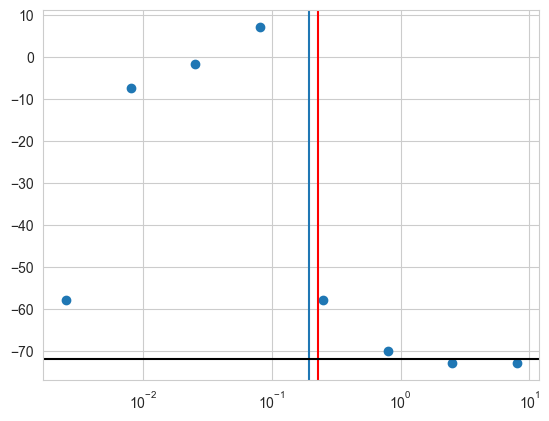

In [7]:
xvals = [float(x) for x in raw_df.loc[0,"Doses (uM)"].split(',')]
yvals = [float(x) for x in raw_df.loc[0,"Activity Data (median)"].split(',')]# - raw_df.loc[0,"Amax"]
plt.scatter(xvals, yvals)
plt.xscale('log')
plt.axvline(raw_df.loc[0,"EC50 (µM)"])
plt.axvline(raw_df.loc[0,"IC50 (µM)"], color="red")
plt.axhline(raw_df.loc[0, "Amax"], color="k")

## Prepare data

In [8]:
def explode_to_long(raw_df):
    raw_df['Doses (uM)'] = raw_df['Doses (uM)'].str.split(',')
    raw_df['Activity Data (median)'] = raw_df['Activity Data (median)'].str.split(',')
    raw_df['Activity SD'] = raw_df['Activity SD'].str.split(',')
    
    raw_df = raw_df.explode(['Doses (uM)', 'Activity Data (median)', "Activity SD"], ignore_index=True)
    
    raw_df['Doses (uM)'] = raw_df['Doses (uM)'].astype(float)
    raw_df['Activity Data (median)'] = raw_df['Activity Data (median)'].astype(float)
    raw_df['Activity SD'] = raw_df['Activity SD'].astype(float)
    return raw_df

# transfroms [0, -100] to [1,0] for curvecurator processing
def transform_activity_range(raw_df):
    raw_df["Activity Data (median)"] = raw_df["Activity Data (median)"] / 100 + 1
    raw_df["Amax"] = raw_df["Amax"] / 100 + 1



In [9]:
raw_df = explode_to_long(raw_df)
transform_activity_range(raw_df)
raw_df["Primary Cell Line Name"] = raw_df["Primary Cell Line Name"].astype(str)


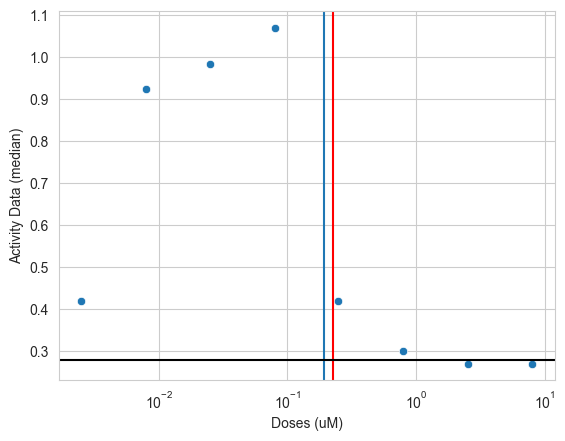

In [10]:
sns.scatterplot(raw_df.iloc[:8], x="Doses (uM)", y="Activity Data (median)")
plt.xscale('log')
plt.axvline(raw_df.loc[0,"EC50 (µM)"])
plt.axvline(raw_df.loc[0,"IC50 (µM)"], color="red")
plt.axhline(raw_df.loc[0, "Amax"], color="k")

In [11]:
# fix drug names in drug_df that cannot map to raw_df
drug_df.merge(raw_df[['Compound']].drop_duplicates(), left_on=["Compound (code or generic name)"], right_on='Compound', how='outer')

,Compound (code or generic name),Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization,Compound
0,17-AAG,Tanespimycin,HSP90,Heat Shock Protein 90 (hsp90) Inhibitor,Other targeted therapies,Phase III,Bristol-Myers Squibb,17-AAG
1,AEW541,NaN,IGF-1R,IGF-1R Inhibitor,Kinase inhibitor,Preclinical,Novartis,AEW541
2,AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca,AZD0530
3,AZD6244,Selumetinib,MEK,MEK1 and MEK2 Inhibitor,Kinase inhibitor,Phase II,AstraZeneca,AZD6244
4,Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech,Erlotinib
5,Irinotecan,Camptosar,Topoisomerase I,DNA Topoisomerase I Inhibitor,Cytotoxic,Launched-1994,Pfizer,Irinotecan
6,L-685458,NaN,Gamma Secretase,gamma-Secretase Inhibitor,Other targeted therapies,Preclinical,Merck Sharp & Dohme,L-685458
7,LBW242,NaN,IAP,Inhibitor of Apoptosis Proteins (IAP) Inhibitor,Other targeted therapies,Preclinical,Novartis,LBW242
8,Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline,Lapatinib
9,Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis,Nilotinib


In [12]:
drug_df.iloc[10,0], drug_df.iloc[20,0]

('PD-0332991 ', 'Panobinostat\xa0\xa0')

In [13]:
# remove trailing characters
drug_df.iloc[10,0] = "PD-0332991"
drug_df.iloc[20,0] = "Panobinostat"

In [14]:
# fix the names in the raw_df
raw_df.loc[raw_df["Compound"] == 'ZD-6474', "Compound"] = "Vandetanib"
raw_df.loc[raw_df["Compound"] == 'PF2341066', "Compound"] = "PF-2341066"

In [15]:
filtered_ccle_drugs = drug_df.merge(raw_df[['Compound']].drop_duplicates(), left_on=["Compound (code or generic name)"], right_on='Compound', how='inner').set_index("Compound (code or generic name)")
filtered_ccle_drugs["Compound (brand name)"].fillna('', inplace=True)
filtered_ccle_drugs

/var/folders/3x/f8j9tddj7flfxt9zx1gkws1m0000gn/T/ipykernel_31076/2199177255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ccle_drugs["Compound (brand name)"].fillna('', inplace=True)


,Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization,Compound
Compound (code or generic name),,,,,,,
Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech,Erlotinib
Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline,Lapatinib
PHA-665752,,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer,PHA-665752
PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer,PF-2341066
TAE684,,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis,TAE684
Vandetanib,Zactima,"Abl, EGFR, Flt3, C-KIT, RET, VEGFR-1, KDR, FLT4",Multi-kinase inhibitor,Kinase inhibitor,Launched-2011,AstraZeneca,Vandetanib
Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis,Nilotinib
AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca,AZD0530
Sorafenib,Nexavar,"Flt3, C-KIT, PDGFRbeta, RET, Raf kinase B, Raf...",Multi-kinase inhibitor,Kinase inhibitor,Launched-2005,Bayer,Sorafenib


### Cell line mapping

In [16]:
cellline_df["Cell line primary name"] = cellline_df["Cell line primary name"].astype(str).fillna("")
cellline_df["Cell line aliases"] = cellline_df["Cell line primary name"].astype(str).fillna("")

ccle_cellline_df = raw_df[['Primary Cell Line Name', "CCLE Cell Line Name"]].drop_duplicates()
ccle_cellline_df = ccle_cellline_df.merge(cellline_df, left_on="CCLE Cell Line Name", right_on="CCLE name", how="left")  # some cannot be mapped
ccle_cellline_df

,Primary Cell Line Name,CCLE Cell Line Name,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
0,1321N1,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,1321N1,NaN,central_nervous_system,glioma,astrocytoma,glioma,solid,"Identical lines: U-118 MG, U-138 MG and 1321N1...",ECACC,1.0,1.0,NaN,1.0,1.0
1,22Rv1,22RV1_PROSTATE,22RV1_PROSTATE,22Rv1,22Rv1,M,prostate,carcinoma,NaN,prostate,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0
2,42-MG-BA,42MGBA_CENTRAL_NERVOUS_SYSTEM,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,42-MG-BA,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,DSMZ,1.0,1.0,1.0,1.0,1.0
3,5637,5637_URINARY_TRACT,5637_URINARY_TRACT,5637,5637,M,urinary_tract,carcinoma,NaN,urinary_tract,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0
4,639-V,639V_URINARY_TRACT,639V_URINARY_TRACT,639-V,639-V,M,urinary_tract,carcinoma,transitional_cell_carcinoma,urinary_tract,solid,NaN,DSMZ,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,WM-983B,WM983B_SKIN,WM983B_SKIN,WM-983B,WM-983B,NaN,skin,malignant_melanoma,NaN,melanoma,solid,NaN,Academic Lab,1.0,1.0,1.0,1.0,1.0
500,YKG1,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,YKG1,F,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1.0,1.0,1.0,1.0
501,ZR-75-1,ZR751_BREAST,ZR751_BREAST,ZR-75-1,ZR-75-1,F,breast,carcinoma,ductal_carcinoma,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,ATCC,1.0,1.0,1.0,1.0,1.0
502,ZR-75-30,ZR7530_BREAST,ZR7530_BREAST,ZR-75-30,ZR-75-30,F,breast,carcinoma,ductal_carcinoma,breast,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0


In [17]:
# some cannot be mapped
ccle_cellline_df[ccle_cellline_df["CCLE name"].isna()]

,Primary Cell Line Name,CCLE Cell Line Name,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
20,ALL-SIL,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,BGC-823,BGC823_STOMACH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,COLO 201,COLO201_LARGE_INTESTINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,COLO-677,COLO677_LUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,DOV13,DOV13_OVARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,GLC-82,GLC82_LUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,HMC-1-8,HMC18_BREAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,KARPAS-422,KARPAS422_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,KP-1NL,KP1NL_PANCREAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,KP-1N,KP1N_PANCREAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drugname to PubChem mapping

In [18]:
results = {}
chembls = {}
manual_review = {}
inchis = {}
i = 0
for brd, vals in filtered_ccle_drugs.iterrows():
    if i % 10 == 0:
        print(i, '/', len(filtered_ccle_drugs))
   
    compounds = pcp.get_compounds(identifier=brd, namespace="name")
    if len(compounds) == 0:
        if vals["Compound (brand name)"]:
            syns = vals["Compound (brand name)"].split(', ')
            syncompounds = []
            for syn in syns:
                syncompounds.extend(pcp.get_compounds(identifier=brd, namespace="name"))
            if len(syncompounds) > 0:
                manual_review[brd] = syncompounds
            else:
                manual_review[brd] = [compounds]
        else:
            manual_review[brd] = [compounds]
    else:
        results[brd] = compounds[0].cid
        #print(dir(compounds[0]))
        inchis = compounds[0].inchi
        chembl = None
        for syn in compounds[0].synonyms or []:
            if syn.startswith("CHEMBL"):
                chembl = syn
                break
        chembls[brd] = chembl
    i += 1

0 / 24
10 / 24
20 / 24


### Checking results

In [19]:
len(results), len(manual_review)

(24, 0)

In [20]:
manual_review |= {brd: cid for brd, cid in results.items() if cid is None}
manual_review

{}

In [21]:
# convert integer CIDs to strings, and in case of multitreatment the list to a comma separated string
def sanitize(val):
    if isinstance(val, int):
        return str(val)
    if isinstance(val, list):
        return ','.join([str(i) for i in val])
    return val

cids = pd.Series(results | manual_review, name="CID").apply(sanitize).astype(str)
cids

Erlotinib          176870
Lapatinib          208908
PHA-665752       10461815
PF-2341066       11626560
TAE684           16038120
Vandetanib        3081361
Nilotinib          644241
AZD0530          10302451
Sorafenib          216239
TKI258          135398510
PD-0332991        5330286
AEW541           11476171
RAF265           11656518
PLX4720          24180719
PD-0325901        9826528
AZD6244          10127622
Nutlin-3           216345
LBW242           11503417
17-AAG            6505803
L-685458          5479543
Panobinostat      6918837
Paclitaxel          36314
Irinotecan          60838
Topotecan           60700
Name: CID, dtype: object

## Cell line name to Cellosaurus Mapping

In [22]:
# Download Cellosaurus data in OBO format
#import urllib
#url = "ftp://ftp.expasy.org/databases/cellosaurus/cellosaurus.txt"
#filename = "cellosaurus.txt"
#urllib.request.urlretrieve(url, filename)
filename = "../../mapping/cellosaurus.txt"

In [23]:
cl_mappings = {}
btos = {}
with open(filename) as handle:
    records = cellosaurus.parse(handle)
    for record in records:
        if 'Homo sapiens' in record['OX'][0]:
            if record["ID"] not in cl_mappings:
                cl_mappings[record["ID"]] = []
            cl_mappings[record["ID"]].append(record["AC"])
            syns = record["SY"].split("; ")
            for syn in syns:
                if syn == '':
                    continue
                if syn not in cl_mappings:
                    cl_mappings[syn] = []
                cl_mappings[syn].append(record["AC"])
            for a, b in record["DR"]:
                if a == 'BTO':
                    if record["AC"] not in btos:
                        btos[record["AC"]] = []
                    btos[record["AC"]].append(b)

In [24]:
ccls = ccle_cellline_df["Primary Cell Line Name"].unique()
mappings = {}
manual_checks = {}
for ccl in ccls:
    cellosaurus_ids = cl_mappings.get(ccl, [])
    if len(cellosaurus_ids) == 1:
        mappings[ccl] = cellosaurus_ids[0]
    else:
        manual_checks[ccl] = cellosaurus_ids

In [25]:
print("CCLs:", len(ccls), "matches:", len(mappings), "ambiguous:", len(manual_checks))

CCLs: 504 matches: 496 ambiguous: 8


In [26]:
manual_checks

{'697': ['CVCL_0079', 'CVCL_8056'],
 'ES-2': ['CVCL_3509', 'CVCL_AX39', 'CVCL_C769'],
 'H4': ['CVCL_6C19', 'CVCL_1239', 'CVCL_HA56'],
 'HARA': [],
 'HH': [],
 'KG-1': ['CVCL_0374', 'CVCL_2971'],
 'PC-3': ['CVCL_4011', 'CVCL_0035', 'CVCL_S982'],
 'U-87 MG': ['CVCL_0022', 'CVCL_GP63']}

In [27]:
manual_checks['697'] = 'CVCL_0079'  # this is 697, according to information on cellosaurus

manual_checks["ES-2"] = 'CVCL_3509'  # this is ES-2, according to information on cellosaurus
manual_checks["H4"] = 'CVCL_1239'  # this is H-4, according to information on cellosaurus
manual_checks["HARA"] = 'CVCL_2914'  # this is HARA [Human squamous cell lung carcinoma], according to information on cellosaurus
manual_checks["HH"] = 'CVCL_1280'    # this is HH [Human Lymphoma], according to information on cellosaurus
manual_checks["KG-1"] = 'CVCL_0374'  # this is KG-1, according to information on cellosaurus

manual_checks["PC-3"] = 'CVCL_0035'  # this is PC-3, according to information on cellosaurus
manual_checks["U-87 MG"] = 'CVCL_0022'  # this is U-87MG ATCC, according to information on cellosaurus



In [28]:
rev_mapping = {}
for key, val in (mappings | manual_checks).items():
    if val not in rev_mapping:
        rev_mapping[val] = []
    rev_mapping[val].append(key)

In [29]:
any([len(val) != 1 for val in rev_mapping.values()])

True

In [30]:
for key, val in rev_mapping.items():
    if len(val) != 1:
        print(key, val)

CVCL_0618 ['MB 157', 'MDA-MB-157']


In [31]:
raw_df[raw_df["Primary Cell Line Name"].str.startswith("MB")][['CCLE Cell Line Name', 'Primary Cell Line Name']].drop_duplicates()

,CCLE Cell Line Name,Primary Cell Line Name
2022,MB157_BREAST,MB 157


In [32]:
raw_df[raw_df["Primary Cell Line Name"].str.startswith("MDA-MB")][['CCLE Cell Line Name', 'Primary Cell Line Name']].drop_duplicates()

,CCLE Cell Line Name,Primary Cell Line Name
2054,MDAMB157_BREAST,MDA-MB-157
2062,MDAMB175VII_BREAST,MDA-MB-175-VII
2070,MDAMB415_BREAST,MDA-MB-415
2078,MDAMB435S_SKIN,MDA-MB-435S
2086,MDAMB436_BREAST,MDA-MB-436
2094,MDAMB453_BREAST,MDA-MB-453
2102,MDAMB468_BREAST,MDA-MB-468


In [33]:
cellline_df[cellline_df["Cell line primary name"].str.startswith("MDA-MB-157")].Notes.values

array(['Identical lines: MB 157 and MDA-MB-157 share high SNP identity'],
      dtype=object)

To resolve the problem with the duplicate entry, the cell line MB  157 will receive a  '_CCLE' tag in its CVCL identifier.

In [34]:
manual_checks["MB 157"] = "CVCL_0618_CCLE"
manual_checks["MDA-MB-157"] = "CVCL_0618"

In [35]:
rev_mapping = {}
for key, val in (mappings | manual_checks).items():
    if val not in rev_mapping:
        rev_mapping[val] = []
    rev_mapping[val].append(key)

In [36]:
any([len(val) != 1 for val in rev_mapping.values()])

False

In [37]:
len(rev_mapping)

504

In [38]:
mappings |= manual_checks

In [39]:
celline_mappings = pd.DataFrame.from_dict(mappings, orient='index')
celline_mappings.columns = ['CVCL']
btos_df = pd.DataFrame({'BTO': btos.values()}, index=btos.keys())

## Compare to Judith's mapping

In [40]:
from utils.convert_to_cello import create_cl_dict, map_to_cellosaurus
celline_mappings = celline_mappings.reset_index()
celline_mappings = celline_mappings.rename(columns={"index": "cell_line_name"})
cello_mapping = pd.read_csv("../../mapping/cellosaurus_01_2024.csv")
# replace all NaN values with empty strings
cello_mapping = cello_mapping.fillna("")
# create cellosaurus dictionary
cellosaurus_ac_dict, cellosaurus_sy_dict, species_dict, cello_ac_to_id_dict = create_cl_dict(cello_mapping)

mapping_df = celline_mappings.copy()
mapping_df["cell_line_original_name"] = mapping_df["cell_line_name"]
mapping_df["cell_line_name"] = mapping_df["cell_line_name"].replace({
    "C32": "C32 [Human melanoma]",
    "C3A": "Hep-G2/C3A",
    "HARA": "HARA [Human squamous cell lung carcinoma]",
    "HH": "HH [Human lymphoma]",
    "JM1": "JM-1"
})
map_to_cellosaurus(mapping_df, cellosaurus_ac_dict, cellosaurus_sy_dict, species_dict, cello_ac_to_id_dict, output_path="CCLE_mapped.csv")
mapping_df = pd.read_csv("CCLE_mapped.csv")
# find out where CVCL is not equal to cellosaurus_id
mapping_df.query("CVCL != cellosaurus_id")

Creating cellosaurus dictionary ...
Mapping cell line names to cellosaurus IDs ...
no main match for MB 157, matched it to CVCL_0618 = MDA-MB-157, but the similarity was rather low:0.625
no main match for U-87 MG, matched it to CVCL_0022 = U-87MG ATCC, but the similarity was rather low:0.6666666666666666
Saving dataframe with cellosaurus IDs ...


,cellosaurus_id,cell_line_name,CVCL,cell_line_original_name
36,CVCL_1097,C32 [Human melanoma],CVCL_ZA06,C32
247,CVCL_0618,MDA-MB-157,CVCL_0618_CCLE,MB 157


## Continue BPO Mapping

In [41]:
# filter relevant and check for more than one BTO mapping
cvcl_to_bto = celline_mappings.merge(btos_df, left_on='CVCL', right_index=True, how='left')#[:220]
cvcl_to_bto.query("BTO.str.len()>1")

,cell_line_name,CVCL,BTO
451,SW480,CVCL_0546,"[BTO_0000038, BTO_0006552]"


In [42]:
# choose BTO:0000038 since the other one refers to SWH80, which is a misspelling of SW-480, according to the entry CVCL_0546 in cellosaurus
cvcl_to_bto.loc["SW480", "BTO"] = ['BTO:0000038']
cvcl_to_bto.query("BTO.str.len()>1")

,cell_line_name,CVCL,BTO
451,SW480,CVCL_0546,"[BTO_0000038, BTO_0006552]"


In [43]:
cvcl_to_bto['BTO'] = cvcl_to_bto.BTO.transform(lambda x: '' if pd.isna(x) else x[0])
cvcl_to_bto

ValueError: Transform function failed

## Bringing viability, drug, and cell line mappings together

In [44]:
full_df = raw_df.merge(cids, left_on='Compound', right_index=True).merge(cvcl_to_bto, left_on='Primary Cell Line Name', right_index=True)
full_df

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,CID,cell_line_name,CVCL,BTO
3661,SW480_LARGE_INTESTINE,SW480,17-AAG,HSP90,0.0025,0.850,5.63,8,Sigmoid,0.087803,0.106521,0.32642,2.2298,6505803,NaN,NaN,[BTO:0000038]
3662,SW480_LARGE_INTESTINE,SW480,17-AAG,HSP90,0.0080,0.979,2.65,8,Sigmoid,0.087803,0.106521,0.32642,2.2298,6505803,NaN,NaN,[BTO:0000038]
3663,SW480_LARGE_INTESTINE,SW480,17-AAG,HSP90,0.0250,0.986,3.86,8,Sigmoid,0.087803,0.106521,0.32642,2.2298,6505803,NaN,NaN,[BTO:0000038]
3664,SW480_LARGE_INTESTINE,SW480,17-AAG,HSP90,0.0800,0.710,13.30,8,Sigmoid,0.087803,0.106521,0.32642,2.2298,6505803,NaN,NaN,[BTO:0000038]
3665,SW480_LARGE_INTESTINE,SW480,17-AAG,HSP90,0.2500,0.340,2.59,8,Sigmoid,0.087803,0.106521,0.32642,2.2298,6505803,NaN,NaN,[BTO:0000038]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92902,SW480_LARGE_INTESTINE,SW480,Vandetanib,EGFR,0.0800,0.951,4.35,8,Constant,NaN,8.000000,0.87922,0.5891,3081361,NaN,NaN,[BTO:0000038]
92903,SW480_LARGE_INTESTINE,SW480,Vandetanib,EGFR,0.2500,0.870,4.92,8,Constant,NaN,8.000000,0.87922,0.5891,3081361,NaN,NaN,[BTO:0000038]
92904,SW480_LARGE_INTESTINE,SW480,Vandetanib,EGFR,0.8000,0.900,2.36,8,Constant,NaN,8.000000,0.87922,0.5891,3081361,NaN,NaN,[BTO:0000038]
92905,SW480_LARGE_INTESTINE,SW480,Vandetanib,EGFR,2.5300,0.830,2.64,8,Constant,NaN,8.000000,0.87922,0.5891,3081361,NaN,NaN,[BTO:0000038]


In [45]:
len(full_df.Compound.unique())

24

In [46]:
len(full_df.CID.unique())

24

ensure there are no duplicates remaining that cause problems when pivoting the dataframe for curvecurator input creation

In [47]:
full_df[full_df[["Compound", "Primary Cell Line Name", "Doses (uM)"]].duplicated(keep=False)][["Compound", "Primary Cell Line Name", "Doses (uM)"]]

,Compound,Primary Cell Line Name,Doses (uM)


rename columns for use in CurveCurator and save.

In [48]:
full_df.rename(columns={"Doses (uM)": "dose", "Activity Data (median)": "response", "CVCL": "sample", "CID": "drug"}, inplace=True)
full_df.to_csv("viabilities_processed.csv", index=None)

In [283]:
preprocess(input_file="viabilities_processed.csv", output_dir='curvecurator', dataset_name="CCLE", cores=100)

# Prepare for DrEvalPy

## Run CurveCurator

In [2]:
_exec_curvecurator(Path("curvecurator"))

In [3]:
postprocess("curvecurator", dataset_name="CCLE")

## Combine curvecurator output with original measures from publication

In [70]:
# load the curvecurator output
viability_df = pd.read_csv("curvecurator/CCLE.csv", converters={"cell_line_id": str, "drug_id": str})

# load the processed viabilities from 00_preprocess_raw_for_curvecurator.ipynb
mapping_df = pd.read_csv("viabilities_processed.csv", converters={"Primary Cell Line Name": str, "Compound": str, "sample": str, "drug": str})[["Primary Cell Line Name", "Compound", "sample", "drug"]].drop_duplicates()

# merge based on cell_line_id, drug_id to get drug name and cell line name back
viability_df = viability_df.merge(mapping_df, left_on=["cell_line_id", "drug_id"], right_on=["sample", "drug"])
viability_df["Compound"] = viability_df["Compound"].str.strip()
viability_df["Primary Cell Line Name"] = viability_df["Primary Cell Line Name"].str.strip()
viability_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,RelevanceScore,Regulation,cell_line_id,drug_id,EC50_curvecurator,IC50_curvecurator,Primary Cell Line Name,Compound,sample,drug
0,CVCL_0031|11656518,0.0,6.380385,3.812538,1.085608,0.767838,-0.380512,1.002747,0.079078,0.730258,...,0.315271,NaN,CVCL_0031,11656518,4.164999e-07,NaN,MCF7,RAF265,CVCL_0031,11656518
1,CVCL_0069|24180719,0.0,3.596879,0.682323,0.944934,6.483646,0.231717,0.994082,0.083130,0.445913,...,0.043004,NaN,CVCL_0069,24180719,2.530000e-04,NaN,SK-MEL-2,PLX4720,CVCL_0069,24180719
2,CVCL_0007|10127622,0.0,5.381694,1.694135,0.922372,0.613620,-0.535126,0.890860,0.036605,0.804497,...,0.603458,not,CVCL_0007,10127622,4.152467e-06,NaN,U-937,AZD6244,CVCL_0007,10127622
3,CVCL_0007|10302451,0.0,8.347859,10.000000,0.945071,1.006109,0.008787,1.001681,0.063080,0.138848,...,-0.000000,not,CVCL_0007,10302451,4.488910e-09,NaN,U-937,AZD0530,CVCL_0007,10302451
4,CVCL_0007|10461815,0.0,5.117873,2.075958,1.015333,0.000100,-1.051984,0.970221,0.065419,0.865978,...,1.260381,NaN,CVCL_0007,10461815,7.623013e-06,7.735483e-06,U-937,PHA-665752,CVCL_0007,10461815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,CVCL_1347|24180719,0.0,5.169925,1.141174,0.981017,0.000100,-1.172495,0.862998,0.034680,0.966734,...,1.623433,down,CVCL_1347,24180719,6.762005e-06,6.537647e-06,KYSE-140,PLX4720,CVCL_1347,24180719
11666,CVCL_1347|3081361,0.0,5.951310,1.963708,1.025005,0.187985,-2.284892,0.738040,0.031100,0.991081,...,2.549042,down,CVCL_1347,3081361,1.118638e-06,1.458050e-06,KYSE-140,Vandetanib,CVCL_1347,3081361
11667,CVCL_1347|36314,0.0,9.602060,10.000000,1.000000,0.345000,-1.535332,0.345000,0.036936,0.974688,...,1.898179,down,CVCL_1347,36314,2.500000e-10,2.810631e-10,KYSE-140,Paclitaxel,CVCL_1347,36314
11668,CVCL_1347|60700,0.0,6.676038,0.805015,1.029543,0.222603,-1.923467,0.540538,0.065302,0.946601,...,1.694064,down,CVCL_1347,60700,2.108445e-07,4.707337e-07,KYSE-140,Topotecan,CVCL_1347,60700


In [109]:
# load the original data
orig_measures_df = pd.read_excel("raw/NIHMS361223-supplement-4.xlsx", sheet_name=11, skiprows=2, converters={"Primary Cell Line Name": str, "Compound": str, "IC50 (µM)": float, 'EC50 (µM)': float, "ActArea": float})
orig_measures_df["IC50"] = orig_measures_df["IC50 (µM)"] / 1e6  # original one is in µM, but we need it in M. 
orig_measures_df["EC50"] = orig_measures_df["EC50 (µM)"] / 1e6  # original one is in µM, but we need it in M. , for some reason one needs to convert to float again...
orig_measures_df["AUC"] = -orig_measures_df["ActArea"] / 8 + 1  # original ActivityArea is calculated as sum(percentage_activity_x for x in doses), so max is 8 with 8 doses but we want to scale to [0,1] 

orig_measures_df["Compound"] = orig_measures_df["Compound"].str.strip()
orig_measures_df["Primary Cell Line Name"] = orig_measures_df["Primary Cell Line Name"].str.strip()

# fix the names as done in 00_preprocess_raw_for_curvecurator.ipynb
orig_measures_df.loc[orig_measures_df["Compound"] == 'ZD-6474', "Compound"] = "Vandetanib"
orig_measures_df.loc[orig_measures_df["Compound"] == 'PF2341066', "Compound"] = "PF-2341066"

In [110]:
# merge curvecurator and original fits
mapped_response_df = viability_df.merge(orig_measures_df, on=["Compound", "Primary Cell Line Name"])
mapped_response_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,IC50,EC50,AUC
0,CVCL_0031|11656518,0.0,6.380385,3.812538,1.085608,0.767838,-0.380512,1.002747,0.079078,0.730258,...,"27.3,5.81,21.4,35.4,12.9,7.66,23.6",7,Constant,NaN,2.531646,-0.857280,0.01511,2.531646e-06,NaN,0.998111
1,CVCL_0069|24180719,0.0,3.596879,0.682323,0.944934,6.483646,0.231717,0.994082,0.083130,0.445913,...,"2.39,13.5,.62,21.0,.72,8.04,10.3",7,Linear,NaN,2.531646,-21.457716,0.44250,2.531646e-06,NaN,0.944688
2,CVCL_0007|10127622,0.0,5.381694,1.694135,0.922372,0.613620,-0.535126,0.890860,0.036605,0.804497,...,"10.8,9.17,8.78,1.80,15.7,10.0,22.1,16.1",8,Sigmoid,2.234367,8.000000,-41.782055,1.14030,8.000000e-06,0.000002,0.857463
3,CVCL_0007|10302451,0.0,8.347859,10.000000,0.945071,1.006109,0.008787,1.001681,0.063080,0.138848,...,"12.5,2.32,11.8,3.55,10.4,18.5,16.9,22.6",8,Linear,NaN,8.000000,-22.127462,0.57930,8.000000e-06,NaN,0.927588
4,CVCL_0007|10461815,0.0,5.117873,2.075958,1.015333,0.000100,-1.051984,0.970221,0.065419,0.865978,...,"8.83,8.04,9.68,8.02,9.98,9.10,12.7,46.5",8,Sigmoid,8.31647,8.000000,-38.214069,0.77960,8.000000e-06,0.000008,0.902550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,CVCL_1347|24180719,0.0,5.169925,1.141174,0.981017,0.000100,-1.172495,0.862998,0.034680,0.966734,...,"4.39,14.8,24.2,6.14,.68,5.12",6,Sigmoid,8.634032,6.805239,-56.326820,0.41870,6.805239e-06,0.000009,0.947662
11666,CVCL_1347|3081361,0.0,5.951310,1.963708,1.025005,0.187985,-2.284892,0.738040,0.031100,0.991081,...,"3.93,8.23,6.62,1.49,5.13,3.00",6,Sigmoid,1.104251,1.448931,-79.231400,1.28400,1.448931e-06,0.000001,0.839500
11667,CVCL_1347|36314,0.0,9.602060,10.000000,1.000000,0.345000,-1.535332,0.345000,0.036936,0.974688,...,"2.30,9.95,3.09,8.22,4.38,7.06",6,Constant,NaN,0.025390,-65.860992,3.53970,2.538952e-08,NaN,0.557538
11668,CVCL_1347|60700,0.0,6.676038,0.805015,1.029543,0.222603,-1.923467,0.540538,0.065302,0.946601,...,"7.10,1.49,12.2,4.07,11.4,2.24",6,Linear,NaN,1.071993,-77.443932,2.39750,1.071993e-06,NaN,0.700313


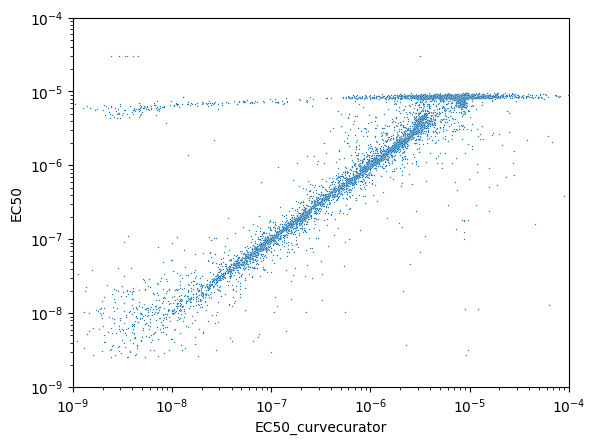

In [120]:
sns.scatterplot(mapped_response_df, x="EC50_curvecurator", y="EC50", s=1)
plt.xlim(1e-9,1e-4)
plt.ylim(1e-9,1e-4)

plt.xscale('log')
plt.yscale('log')

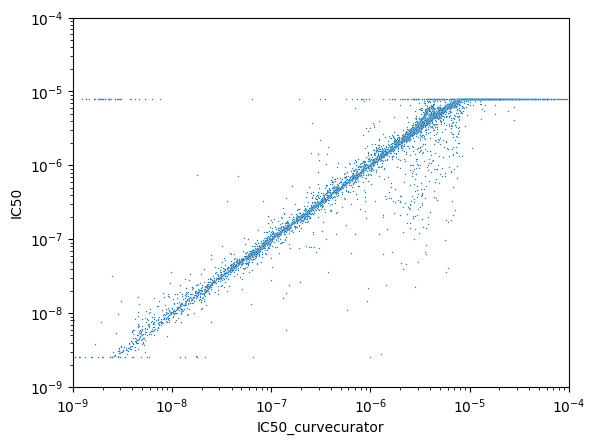

In [119]:
sns.scatterplot(mapped_response_df, x="IC50_curvecurator", y="IC50", s=1)
plt.xlim(1e-9,1e-4)
plt.ylim(1e-9,1e-4)

plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='AUC_curvecurator', ylabel='AUC'>

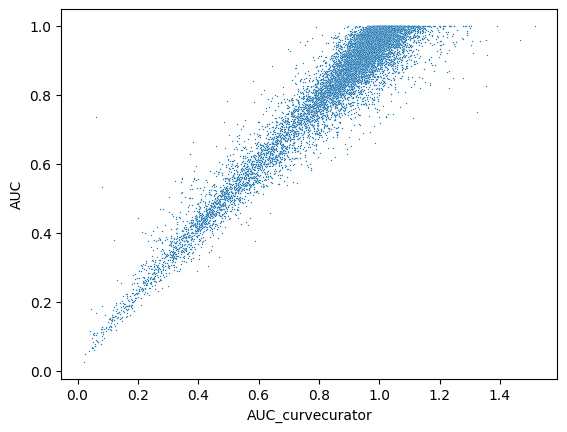

In [112]:
sns.scatterplot(mapped_response_df, x="AUC_curvecurator", y="AUC", s=1)
#plt.xlim(1e-9,1e-0)
#plt.ylim(1e-9,1e-0)

#plt.xscale('log')
#plt.yscale('log')

In [126]:
mapped_response_df.query("IC50_curvecurator<3*1e-9").query("IC50 > 1e-6")

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,IC50,EC50,AUC
207,CVCL_0031|36314,0.0,9.353200,0.570348,0.997983,0.014835,-5.756730,0.081727,0.115612,0.868005,...,"4.19,6.21,7.29,23.8,1.69,19.4,21.3,13.7",8,Sigmoid,0.018154,8.0,-98.355804,3.7399,0.000008,0.0,0.532512
414,CVCL_0065|36314,0.0,8.797697,1.005055,0.999871,0.021655,-5.516799,0.080985,0.004693,0.999765,...,"2.00,2.18,1.16,.67,.16,.23,.78,.0025",8,Sigmoid,0.002751,8.0,-97.732346,7.2847,0.000008,0.0,0.089413
529,CVCL_0080|36314,0.0,8.545618,2.594891,1.000032,0.039271,-4.670380,0.079454,0.003975,0.999852,...,"36.7,3.12,.61,.16,1.02,.46,.25,.81",8,Sigmoid,5.060275,8.0,-96.183815,7.0239,0.000008,0.000005,0.122012
762,CVCL_0153|36314,0.0,9.055977,0.620098,1.000007,0.098289,-3.301295,0.173457,0.013050,0.997729,...,"2.26,8.71,4.55,1.22,2.98,1.42,1.22,2.87",8,Sigmoid,0.003602,8.0,-89.792152,6.7040,0.000008,0.0,0.162000
1263,CVCL_0332|36314,0.0,8.594807,0.900011,0.998208,0.026455,-5.203146,0.120097,0.018970,0.996272,...,"12.9,1.15,1.07,.68,.13,.30,1.61,1.36",8,Sigmoid,0.012234,8.0,-96.140671,6.8292,0.000008,0.0,0.146350
1492,CVCL_0379|36314,0.0,8.710209,0.946420,0.998694,0.007903,-6.916143,0.083376,0.023592,0.994335,...,"9.42,3.61,.18,.50,.24,1.27,.30,.15",8,Sigmoid,0.008656,8.0,-98.119377,7.1048,0.000008,0.0,0.111900
1607,CVCL_0419|36314,0.0,8.840593,1.211403,0.999756,0.187582,-2.414224,0.222038,0.023471,0.991544,...,"5.75,1.75,.75,2.43,6.00,4.26,2.62,3.28",8,Sigmoid,0.005765,8.0,-81.029770,6.0750,0.000008,0.0,0.240625
1703,CVCL_0434|36314,0.0,8.974938,0.753060,1.000350,0.177105,-2.489299,0.233999,0.024099,0.990994,...,"21.0,.63,1.63,1.04,1.17,7.42,1.02,3.74",8,Sigmoid,6.783455,8.0,-82.758080,5.8234,0.000008,0.000007,0.272075
1913,CVCL_0505|36314,0.0,9.048649,0.476759,0.998798,0.106670,-3.081043,0.214431,0.030718,0.986681,...,"28.4,8.06,4.40,2.78,1.24,3.80,4.22,4.11",8,Sigmoid,0.026808,8.0,-83.733665,6.0950,0.000008,0.0,0.238125
1960,CVCL_0525|36314,0.0,8.807955,0.488096,0.998511,0.126499,-2.838996,0.252408,0.039688,0.977144,...,"15.8,2.32,.37,4.31,2.54,1.00,1.03,.46",8,Sigmoid,0.038306,8.0,-83.542999,4.9680,0.000008,0.0,0.379000


In [115]:
mapped_response_df.to_csv("CCLE_for_drevalpy.csv")

## Final tweaks
- Change the following cell line IDs: 
    - C32: CVCL_ZA06 -> CVCL_1097
    - MB 157: CVCL_0618_CCLE -> CVCL_0618
- Set EC50s outside the measured range to NaN
    - min measured dosis: 0.0025 uM -> -log10(10^(-6) * 0.0025) = 8.60206
    - max measured dosis: 8 uM -> -log10(10^(-6) * 8) = 5.09691
- Set IC50s outside 10*max/10**-1 min measured range to NaN
- Add min/max dosages to the dataframe

In [2]:
mapped_response_df = pd.read_csv("CCLE_for_drevalpy.csv")
mapped_response_df = mapped_response_df.drop(columns=["Unnamed: 0"])
mapped_response_df["sample"] = mapped_response_df["sample"].replace(to_replace = "CVCL_ZA06", value="CVCL_1097")
mapped_response_df["cell_line_id"] = mapped_response_df["cell_line_id"].replace(to_replace = "CVCL_ZA06", value="CVCL_1097")
mapped_response_df["sample"] = mapped_response_df["sample"].replace(to_replace = "CVCL_0618_CCLE", value="CVCL_0618")
mapped_response_df["cell_line_id"] = mapped_response_df["cell_line_id"].replace(to_replace = "CVCL_0618_CCLE", value="CVCL_0618")
mapped_response_df["Name"] = [row["cell_line_id"] + "|" + str(row["drug_id"]) for _, row in mapped_response_df.iterrows()]
mapped_response_df["min_dose_M"] = 0.0025 * 1e-6
mapped_response_df["max_dose_M"] = 8 * 1e-6
mapped_response_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,IC50,EC50,AUC,min_dose_M,max_dose_M
0,CVCL_0031|11656518,0.0,6.380385,3.812538,1.085608,0.767838,-0.380512,1.002747,0.079078,0.730258,...,Constant,NaN,2.531646,-0.857280,0.01511,2.531646e-06,NaN,0.998111,2.500000e-09,0.000008
1,CVCL_0069|24180719,0.0,3.596879,0.682323,0.944934,6.483646,0.231717,0.994082,0.083130,0.445913,...,Linear,NaN,2.531646,-21.457716,0.44250,2.531646e-06,NaN,0.944688,2.500000e-09,0.000008
2,CVCL_0007|10127622,0.0,5.381694,1.694135,0.922372,0.613620,-0.535126,0.890860,0.036605,0.804497,...,Sigmoid,2.234367,8.000000,-41.782055,1.14030,8.000000e-06,2.234367e-06,0.857463,2.500000e-09,0.000008
3,CVCL_0007|10302451,0.0,8.347859,10.000000,0.945071,1.006109,0.008787,1.001681,0.063080,0.138848,...,Linear,NaN,8.000000,-22.127462,0.57930,8.000000e-06,NaN,0.927588,2.500000e-09,0.000008
4,CVCL_0007|10461815,0.0,5.117873,2.075958,1.015333,0.000100,-1.051984,0.970221,0.065419,0.865978,...,Sigmoid,8.316470,8.000000,-38.214069,0.77960,8.000000e-06,8.316470e-06,0.902550,2.500000e-09,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,CVCL_1347|24180719,0.0,5.169925,1.141174,0.981017,0.000100,-1.172495,0.862998,0.034680,0.966734,...,Sigmoid,8.634032,6.805239,-56.326820,0.41870,6.805239e-06,8.634032e-06,0.947662,2.500000e-09,0.000008
11666,CVCL_1347|3081361,0.0,5.951310,1.963708,1.025005,0.187985,-2.284892,0.738040,0.031100,0.991081,...,Sigmoid,1.104251,1.448931,-79.231400,1.28400,1.448931e-06,1.104251e-06,0.839500,2.500000e-09,0.000008
11667,CVCL_1347|36314,0.0,9.602060,10.000000,1.000000,0.345000,-1.535332,0.345000,0.036936,0.974688,...,Constant,NaN,0.025390,-65.860992,3.53970,2.538952e-08,NaN,0.557538,2.500000e-09,0.000008
11668,CVCL_1347|60700,0.0,6.676038,0.805015,1.029543,0.222603,-1.923467,0.540538,0.065302,0.946601,...,Linear,NaN,1.071993,-77.443932,2.39750,1.071993e-06,NaN,0.700313,2.500000e-09,0.000008


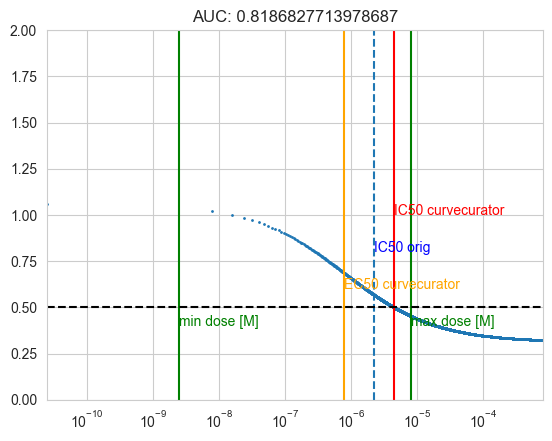

In [5]:
def plot_curve(df, index):
    front = df.loc[index, "Front"]
    back = df.loc[index, "Back"]
    pec50 = df.loc[index, "pEC50_curvecurator"]
    ec50 = df.loc[index, "EC50_curvecurator"]
    
    slope = df.loc[index, "Slope"]
    ic50 = df.loc[index, "IC50_curvecurator"]
    origic50 = df.loc[index, "IC50"]
    
    min_dosis = df.loc[index, "min_dose_M"]
    max_dosis = df.loc[index, "max_dose_M"]
    
    xvals = np.linspace(min_dosis*10**-2, max_dosis*10**2, 100000)
    xvals_logged = np.log10(xvals)
    y = (front - back) / (1 + 10 ** (slope * (xvals_logged + pec50))) + back
    plt.scatter(xvals, y, s=1)

    plt.axvline(origic50, linestyle='--')
    plt.text(x=origic50, y=0.8, s='IC50 orig', color='blue')
    plt.axvline(ic50, color="red")
    plt.text(x=ic50, y=1.0, s='IC50 curvecurator', color='red')
    plt.axvline(ec50, color="orange")
    plt.text(x=ec50, y=0.6, s='EC50 curvecurator', color='orange')
    plt.axvline(x=min_dosis, color="green")
    plt.text(x=min_dosis, y=0.4, s='min dose [M]', color='green')
    plt.axvline(x=max_dosis, color="green")
    plt.text(x=max_dosis, y=0.4, s='max dose [M]', color='green')
    
    auc = df.loc[index, "AUC_curvecurator"]
    plt.title(f"AUC: {auc}")

    plt.axhline(0.5, linestyle='--', color='black')
    plt.xscale('log')
    plt.xlim(min_dosis*10**-2, max_dosis*10**2)
    plt.ylim(0, 2)

plot_curve(df=mapped_response_df, index=25)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


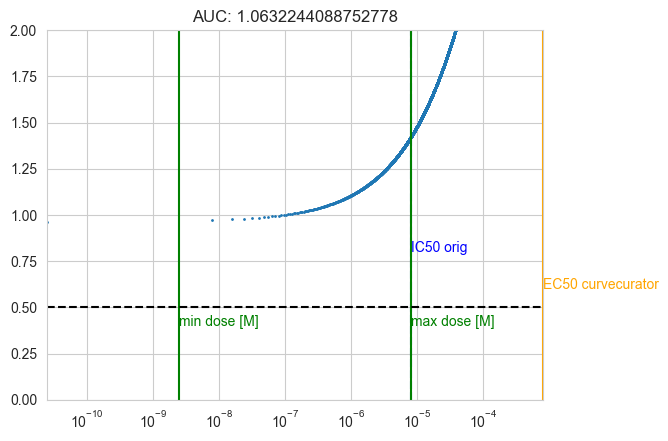

In [6]:
# CurveCurator caps the EC50 at 100*maximal dosis = -log10(10^(-6) * 800) = 3.09691
index = mapped_response_df.query("Name == 'CVCL_0942|216239'").index[0]
plot_curve(df=mapped_response_df, index=index)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


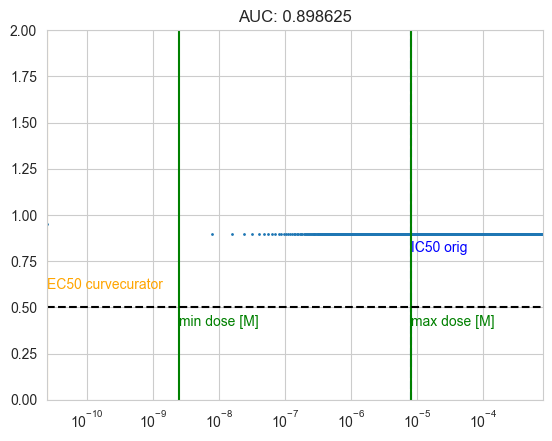

In [7]:
# CurveCurator caps the EC50 at 10**-2*minimal dosis = -log10(10^(-6) * 0.000025) = 10.60206
index = mapped_response_df.query("Name == 'CVCL_2034|3081361'").index[0]
plot_curve(df=mapped_response_df, index=index)

In [8]:
# limit to measured range -> pEC50 >= -log10(10^-6 * 8) and pEC50 <= -log10(10^-6 * 0.0025)
max_pEC50 = -np.log10(10**-6 * 8)
min_pEC50 = -np.log10(10**-6 * 0.0025)
len_before = sum(pd.isna(mapped_response_df["pEC50_curvecurator"]))
new_pEC50s = mapped_response_df["pEC50_curvecurator"].apply(lambda x: x if min_pEC50 >= x >= max_pEC50 else np.nan)
mapped_response_df["pEC50_curvecurator"] = new_pEC50s
print(f"From {len_before} to {sum(pd.isna(mapped_response_df['pEC50_curvecurator']))} NaN pEC50s (/{len(mapped_response_df)}).")

From 0 to 2048 NaN pEC50s (/11670).


In [9]:
max_IC50 = 10**-5 * 8
min_IC50 = 10**-7 * 0.0025
# filter only if not nan
len_before = sum(pd.isna(mapped_response_df["IC50_curvecurator"]))
new_IC50s = mapped_response_df["IC50_curvecurator"].apply(lambda x: x if min_IC50 <= x <= max_IC50 and not pd.isna(x) else np.nan)
mapped_response_df["IC50_curvecurator"] = new_IC50s
print(f"From {len_before} to {sum(pd.isna(mapped_response_df['IC50_curvecurator']))} NaN IC50s (/{len(mapped_response_df)}).")

From 4391 to 4511 NaN IC50s (/11670).


In [10]:
mapped_response_df["LN_IC50_curvecurator"] = np.log(10**6 * mapped_response_df["IC50_curvecurator"].to_numpy())

<Axes: xlabel='LN_IC50_curvecurator', ylabel='Count'>

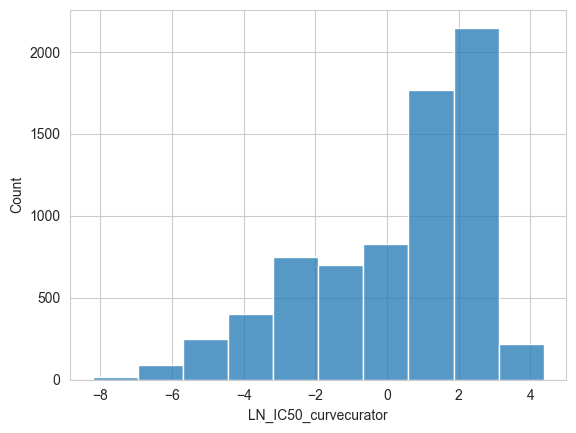

In [11]:
sns.histplot(mapped_response_df["LN_IC50_curvecurator"], bins=10)

<Axes: xlabel='pEC50_curvecurator', ylabel='Count'>

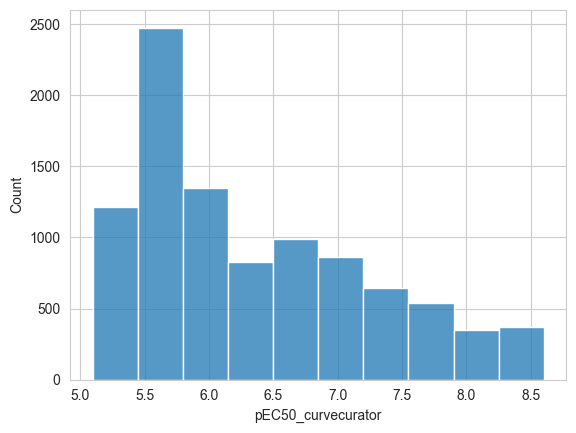

In [12]:
sns.histplot(mapped_response_df["pEC50_curvecurator"], bins=10)

<Axes: xlabel='AUC_curvecurator', ylabel='Count'>

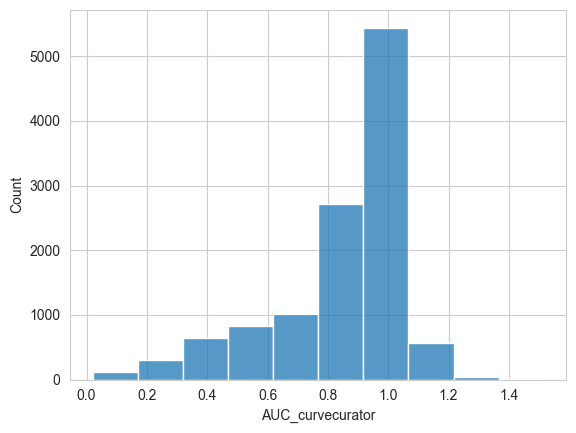

In [13]:
sns.histplot(mapped_response_df["AUC_curvecurator"], bins=10)

In [14]:
# map all names to cellosaurus main names
from utils.convert_to_cello import create_cl_dict
cello_mapping = pd.read_csv("../../mapping/cellosaurus_01_2024.csv")
# replace all NaN values with empty strings
cello_mapping = cello_mapping.fillna("")
# create cellosaurus dictionary
cellosaurus_ac_dict, cellosaurus_sy_dict, species_dict, cello_ac_to_id_dict = create_cl_dict(cello_mapping)

Creating cellosaurus dictionary ...


In [15]:
main_names = [cello_ac_to_id_dict[row["cell_line_id"]] for _, row in mapped_response_df.iterrows()]
mapped_response_df["cell_line_name"] = main_names
mapped_response_df = mapped_response_df.set_index(["cell_line_id", "cell_line_name", "drug_id", "Compound"])

In [16]:
mapped_response_df.to_csv("CCLE.csv")

In [17]:
mapped_response_df

Name  \
cell_line_id cell_line_name drug_id  Compound                         
CVCL_0031    MCF-7          11656518 RAF265      CVCL_0031|11656518   
CVCL_0069    SK-MEL-2       24180719 PLX4720     CVCL_0069|24180719   
CVCL_0007    U-937          10127622 AZD6244     CVCL_0007|10127622   
                            10302451 AZD0530     CVCL_0007|10302451   
                            10461815 PHA-665752  CVCL_0007|10461815   
...                                                             ...   
CVCL_1347    KYSE-140       24180719 PLX4720     CVCL_1347|24180719   
                            3081361  Vandetanib   CVCL_1347|3081361   
                            36314    Paclitaxel     CVCL_1347|36314   
                            60700    Topotecan      CVCL_1347|60700   
                            6505803  17-AAG       CVCL_1347|6505803   

                                                 SignalQuality  \
cell_line_id cell_line_name drug_id  Compound                    
CVCL_0031    MCF-7          11656518 RAF265                0.0   
CVCL_0069    SK-MEL-2       24180719 PLX4720               0.0   
CVCL_0007    U-937          10127622 AZD6244               0.0   
                            10302451 AZD0530               0.0   
                            10461815 PHA-665752            0.0   
...                                                        ...   
CVCL_1347    KYSE-140       24180719 PLX4720               0.0   
                            3081361  Vandetanib            0.0   
                            36314    Paclitaxel            0.0   
                            60700    Topotecan             0.0   
                            6505803  17-AAG                0.0   

                                                 pEC50_curvecurator  \
cell_line_id cell_line_name drug_id  Compound                         
CVCL_0031    MCF-7          11656518 RAF265                6.380385   
CVCL_0069    SK-MEL-2       24180719 PLX4720                    NaN   
CVCL_0007    U-937          10127622 AZD6244               5.381694   
                            10302451 AZD0530               8.347859   
                            10461815 PHA-665752            5.117873   
...                                                             ...   
CVCL_1347    KYSE-140       24180719 PLX4720               5.169925   
                            3081361  Vandetanib            5.951310   
                            36314    Paclitaxel                 NaN   
                            60700    Topotecan             6.676038   
                            6505803  17-AAG                6.159765   

                                                     Slope     Front  \
cell_line_id cell_line_name drug_id  Compound                          
CVCL_0031    MCF-7          11656518 RAF265       3.812538  1.085608   
CVCL_0069    SK-MEL-2       24180719 PLX4720      0.682323  0.944934   
CVCL_0007    U-937          10127622 AZD6244      1.694135  0.922372   
                            10302451 AZD0530     10.000000  0.945071   
                            10461815 PHA-665752   2.075958  1.015333   
...                                                    ...       ...   
CVCL_1347    KYSE-140       24180719 PLX4720      1.141174  0.981017   
                            3081361  Vandetanib   1.963708  1.025005   
                            36314    Paclitaxel  10.000000  1.000000   
                            60700    Topotecan    0.805015  1.029543   
                            6505803  17-AAG       2.217223  1.037807   

                                                     Back  FoldChange  \
cell_line_id cell_line_name drug_id  Compound                           
CVCL_0031    MCF-7          11656518 RAF265      0.767838   -0.380512   
CVCL_0069    SK-MEL-2       24180719 PLX4720     6.483646    0.231717   
CVCL_0007    U-937          10127622 AZD6244     0.613620   -0.535126   
                            10302451 AZD0530     1.006